In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv('df_hourly.csv')
df.head()

,timestamp,usage,cost,DAY OR NIGHT,MONTH,YEAR,DAY,SEASON,IS WEEKDAY,IS HOLIDAY
0,2016-10-22 00:00:00,0.04,0.0,0,10,2016,22,2,0,0
1,2016-10-22 01:00:00,0.04,0.0,0,10,2016,22,2,0,0
2,2016-10-22 02:00:00,0.08,0.0,0,10,2016,22,2,0,0
3,2016-10-22 03:00:00,0.04,0.0,0,10,2016,22,2,0,0
4,2016-10-22 04:00:00,0.04,0.0,0,10,2016,22,2,0,0


In [3]:
df.shape

(17592, 10)

In [4]:
df = df.drop('SEASON', axis = 1)

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [6]:
df = df.set_index('timestamp')

In [7]:
# import pandas as pd
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import mean_squared_error

# X = df.drop('usage', axis=1)
# y = df['usage']

# # Split your data into training and testing sets
# # This is a simplistic split. In practice, you might want to use time-based splitting
# train_size = int(len(df) * 0.8)
# X_train, X_test = X[:train_size], X[train_size:]
# y_train, y_test = y[:train_size], y[train_size:]

# # Train the decision tree model
# model = DecisionTreeRegressor()
# model.fit(X_train, y_train)

# # Make predictions and evaluate the model
# predictions = model.predict(X_test)
# mse = mean_squared_error(y_test, predictions)
# print(f"Mean Squared Error: {mse}")

# # Create lag features
# for i in range(17582, 17592):  # Assuming you're using the last 10 hours to predict the next hour
#     df[f'lag_{i}'] = df['usage'].shift(i)

# df = df.dropna()

# # Predict the next 10 hours (this requires the last 10 hours of actual data)
# # Replace 'recent_data' with your actual last 10 hours of data in the correct format
# recent_data = pd.DataFrame([df.tail(10)['electricity_usage'].values], columns=X.columns)
# next_10_hours_prediction = model.predict(recent_data)
# print(f"Predicted Electricity Usage for the Next 10 Hours: {next_10_hours_prediction}")

In [8]:
from sklearn.model_selection import train_test_split

def make_features(df, max_lag, rolling_mean_size):
    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df['usage'].shift(lag)

    df['rolling_mean'] = (
        df['usage'].shift().rolling(rolling_mean_size).mean()
    )


# we chose argument values at random
make_features(df, 1, 1)


train, test = train_test_split(df, shuffle=False, test_size=0.2)

print(train.shape)
print(test.shape)
print(train.isnull().sum())

#drop rows that have Nan values
train.dropna(axis=0,inplace=True)

(14073, 10)
(3519, 10)
usage           0
cost            0
DAY OR NIGHT    0
MONTH           0
YEAR            0
DAY             0
IS WEEKDAY      0
IS HOLIDAY      0
lag_1           1
rolling_mean    1
dtype: int64


In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#Training Model

features_train = train.drop(['usage'], axis=1)
target_train = train['usage']
features_test = test.drop(['usage'], axis=1)
target_test = test['usage']

data = df.drop(['usage'], axis=1)
recent_data = data.tail(20)

model = DecisionTreeRegressor(criterion='poisson', splitter='best', max_depth=9, min_samples_leaf=7, min_weight_fraction_leaf=0)

pred_train = model.fit(features_train,target_train)
pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

print(
    'MAE for the training set:', mean_absolute_error(target_train, pred_train)
)
print('MAE for the test set:', mean_absolute_error(target_test, pred_test))

print(
    'RMSE for the training set:', np.sqrt(mean_absolute_error(target_train, pred_train))
)
print('RMSE for the test set:', np.sqrt(mean_absolute_error(target_test, pred_test)))

MAE for the training set: 0.0442281262203437
MAE for the test set: 0.04400475416879802
RMSE for the training set: 0.21030484117191336
RMSE for the test set: 0.20977310163316462


In [26]:
recent_data

,cost,DAY OR NIGHT,MONTH,YEAR,DAY,IS WEEKDAY,IS HOLIDAY,lag_1,rolling_mean
timestamp,,,,,,,,,
2018-10-24 04:00:00,0.00,0,10,2018,24,1,0,0.08,0.08
2018-10-24 05:00:00,0.00,0,10,2018,24,1,0,0.08,0.08
2018-10-24 06:00:00,0.00,1,10,2018,24,1,0,0.04,0.04
2018-10-24 07:00:00,0.00,1,10,2018,24,1,0,0.08,0.08
2018-10-24 08:00:00,0.00,1,10,2018,24,1,0,0.04,0.04
2018-10-24 09:00:00,0.00,1,10,2018,24,1,0,0.04,0.04
2018-10-24 10:00:00,0.00,1,10,2018,24,1,0,0.08,0.08
2018-10-24 11:00:00,0.00,1,10,2018,24,1,0,0.04,0.04
2018-10-24 12:00:00,0.00,1,10,2018,24,1,0,0.08,0.08


In [27]:
# recent_data = pd.DataFrame([df.tail(20)['usage'].values], columns=df.columns)
next_10_hours_prediction = model.predict(recent_data)
print(f"Predicted Electricity Usage for the Next 10 Hours: {next_10_hours_prediction}")

Predicted Electricity Usage for the Next 10 Hours: [0.06695788 0.06695788 0.07728814 0.06695788 0.07728814 0.07728814
 0.06695788 0.07728814 0.06695788 0.07728814 0.12196319 0.07137662
 0.12196319 0.15389831 0.07449664 0.12196319 0.14307692 0.14307692
 0.07449664 0.12196319]


In [34]:
next_10_hrs = [0.06695788, 0.06695788, 0.07728814, 0.06695788, 0.07728814, 0.07728814,
 0.06695788, 0.07728814, 0.06695788, 0.07728814]

In [36]:
timestmp = ['2018-10-25 00:00:00',
 '2018-10-25 01:00:00',
 '2018-10-25 02:00:00',
 '2018-10-25 03:00:00',
 '2018-10-25 04:00:00',
 '2018-10-25 05:00:00',
 '2018-10-25 06:00:00',
 '2018-10-25 07:00:00',
 '2018-10-25 08:00:00',
 '2018-10-25 09:00:00']

In [44]:
d = {'timestamp': timestmp, 'prediction': next_10_hrs}
df_preds = pd.DataFrame(data=d, columns=['timestamp', 'prediction'])
df_preds = df_preds.set_index('timestamp')
df_preds

,prediction
timestamp,
2018-10-25 00:00:00,0.066958
2018-10-25 01:00:00,0.066958
2018-10-25 02:00:00,0.077288
2018-10-25 03:00:00,0.066958
2018-10-25 04:00:00,0.077288
2018-10-25 05:00:00,0.077288
2018-10-25 06:00:00,0.066958
2018-10-25 07:00:00,0.077288
2018-10-25 08:00:00,0.066958


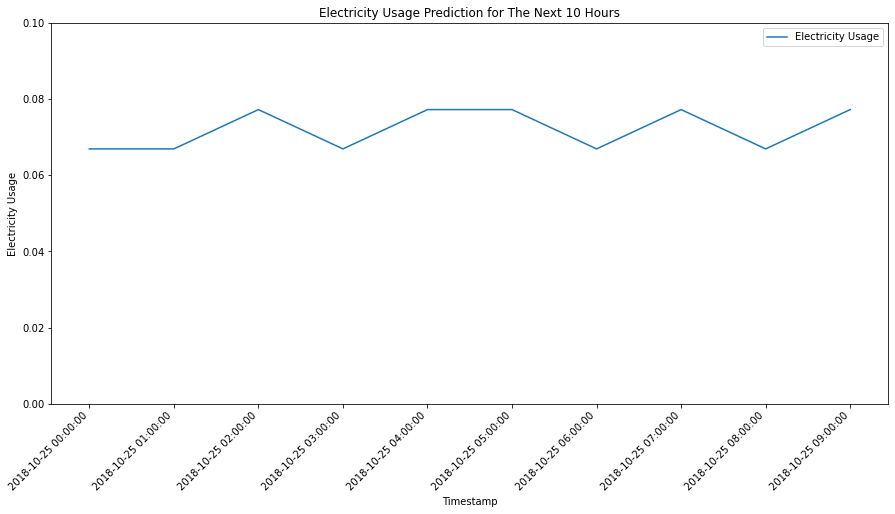

In [53]:
plt.figure(figsize=(15,7))
plt.plot(df_preds, label='Electricity Usage')
plt.title('Electricity Usage Prediction for The Next 10 Hours')
plt.xlabel('Timestamp')  # Label for X-axis
plt.ylabel('Electricity Usage')  # Label for Y-axis
plt.ylim(0, 0.1)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

In [28]:
pd.DataFrame([df.tail(20)['usage'].values])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.08,0.04,0.08,0.04,0.04,0.08,0.04,0.08,0.04,0.04,0.12,0.08,0.12,0.12,0.08,0.12,0.12,0.12,0.08,0.12


In [29]:
df.tail

<bound method NDFrame.tail of                      usage  cost  DAY OR NIGHT  MONTH  YEAR  DAY  IS WEEKDAY  \
timestamp                                                                      
2016-10-22 00:00:00   0.04  0.00             0     10  2016   22           0   
2016-10-22 01:00:00   0.04  0.00             0     10  2016   22           0   
2016-10-22 02:00:00   0.08  0.00             0     10  2016   22           0   
2016-10-22 03:00:00   0.04  0.00             0     10  2016   22           0   
2016-10-22 04:00:00   0.04  0.00             0     10  2016   22           0   
...                    ...   ...           ...    ...   ...  ...         ...   
2018-10-24 19:00:00   0.12  0.04             0     10  2018   24           1   
2018-10-24 20:00:00   0.12  0.04             0     10  2018   24           1   
2018-10-24 21:00:00   0.12  0.04             0     10  2018   24           1   
2018-10-24 22:00:00   0.08  0.00             0     10  2018   24           1   
2018-10-24